In [1]:
import sys
sys.path.append('lib')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pre_process import pre_process

In [2]:
data = pre_process()
print(str(data.last_date))
data.kor_daily_data

2021-05-26


,confirmed,critical,death,negative,released,tested,C1,C2,C3,C4,C6,C7,C8,H1,H2,H3,H6,Stringency,Containment,positive_ratio
date,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.38,0.000000
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.38,0.000000
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.38,0.000000
2020-01-24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.38,1.000000
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.38,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-22,645.0,150.0,4.0,29778.0,874.0,33858.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,50.0,60.83,0.019050
2021-05-23,575.0,149.0,5.0,10071.0,848.0,15333.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,50.0,60.83,0.037501
2021-05-24,527.0,144.0,3.0,18307.0,447.0,17314.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,50.0,60.83,0.030438


# Check data

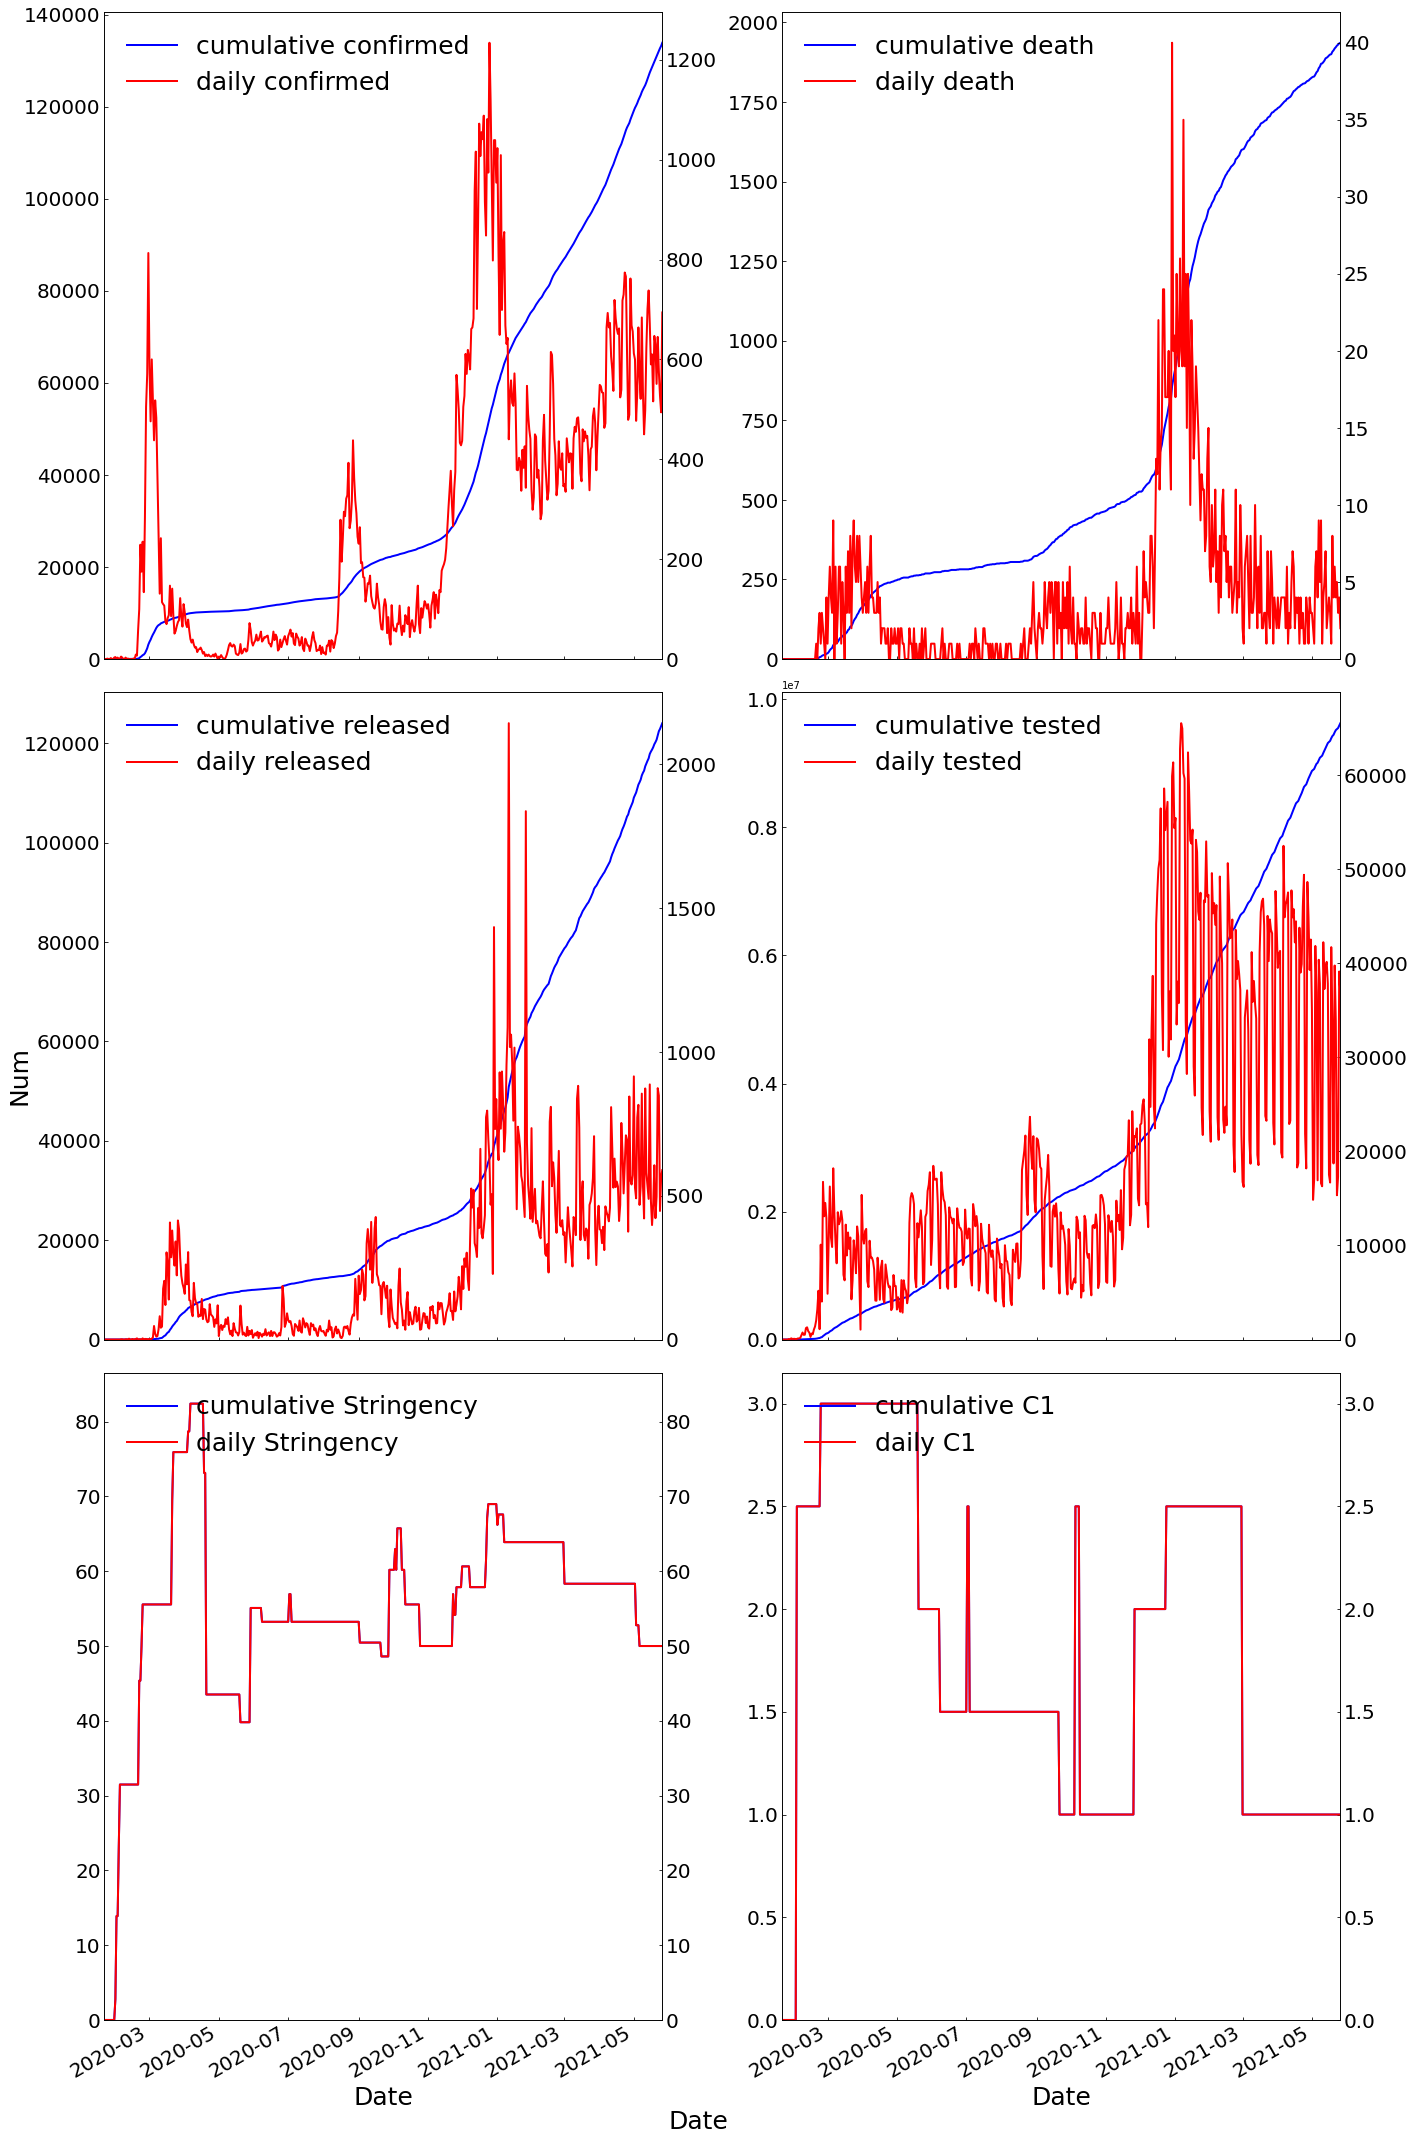

In [3]:
data.plot(col_list=['confirmed', 'death', 'released', 'tested', 'Stringency', 'C1'])

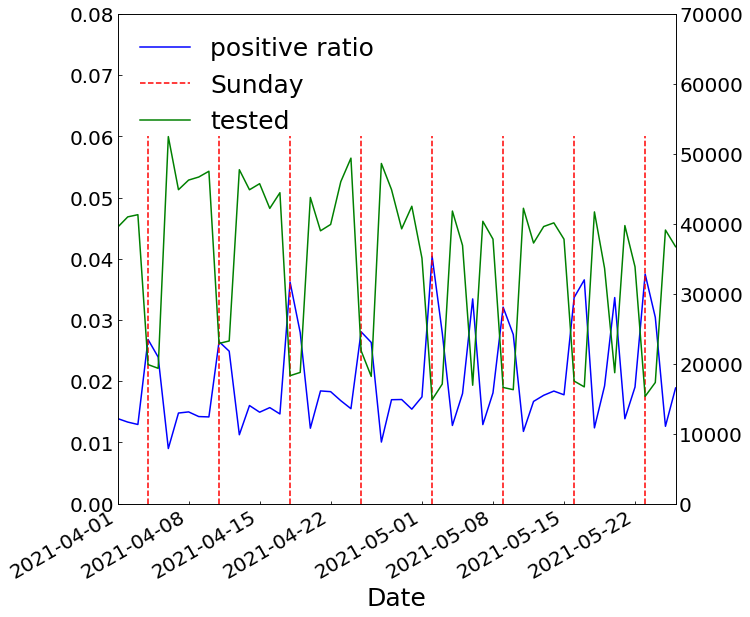

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data.kor_daily_data.index, data.kor_daily_data['positive_ratio'], 'b-', label='positive ratio')

ax1 = ax.twinx()
ax1.plot(data.kor_daily_data.index, data.kor_daily_data['tested'], 'g-', label='tested')

for i, x in enumerate(data.kor_daily_data.index):
    if i == 5:
        ax.plot([x, x], [0, 0.06], 'r--', label=x.day_name())
    elif i % 7 == 5:
        ax.plot([x, x], [0, 0.06], 'r--')

ax.set_xlabel("Date", fontsize=25)
ax.tick_params(axis='both', labelsize=20, direction='in')
ax1.tick_params(axis='both', labelsize=20, direction='in')
ax.set_ylim([0, 0.08])
ax1.set_ylim([0, 70000])
ax.set_xlim([pd.Timestamp('2021-04'), data.kor_daily_data.index[-1]])


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', frameon=False, fontsize=25)

fig.autofmt_xdate()
fig.show()


Best correlation between confirmed, Containment: 0.0795 with shift of 36


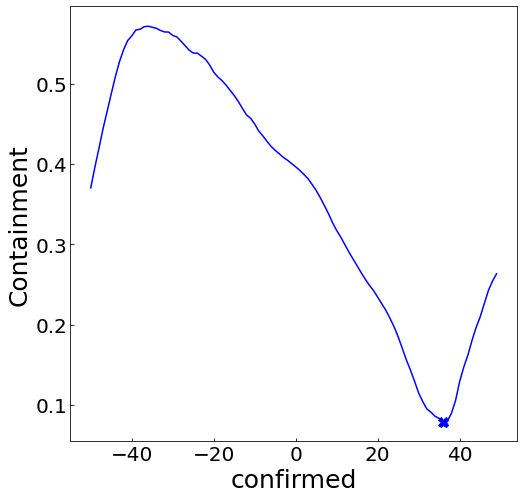

In [13]:
x_name = 'confirmed'
# y_name = 'Stringency'
y_name = 'Containment'

shift_range, correlation = data.get_correlation_shift(x_name, y_name)
best_idx = np.nanargmin(correlation)

print("Best correlation between {}, {}: {:.4f} with shift of {}".format(x_name, y_name, correlation[best_idx], shift_range[best_idx]))
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(shift_range, correlation, 'b-')
ax.plot(shift_range[best_idx], correlation[best_idx], 'bX', markersize=10)

ax.set_xlabel(x_name, fontsize=25)
ax.set_ylabel(y_name, fontsize=25)
ax.tick_params(axis='both', labelsize=20, direction='in')

fig.show()

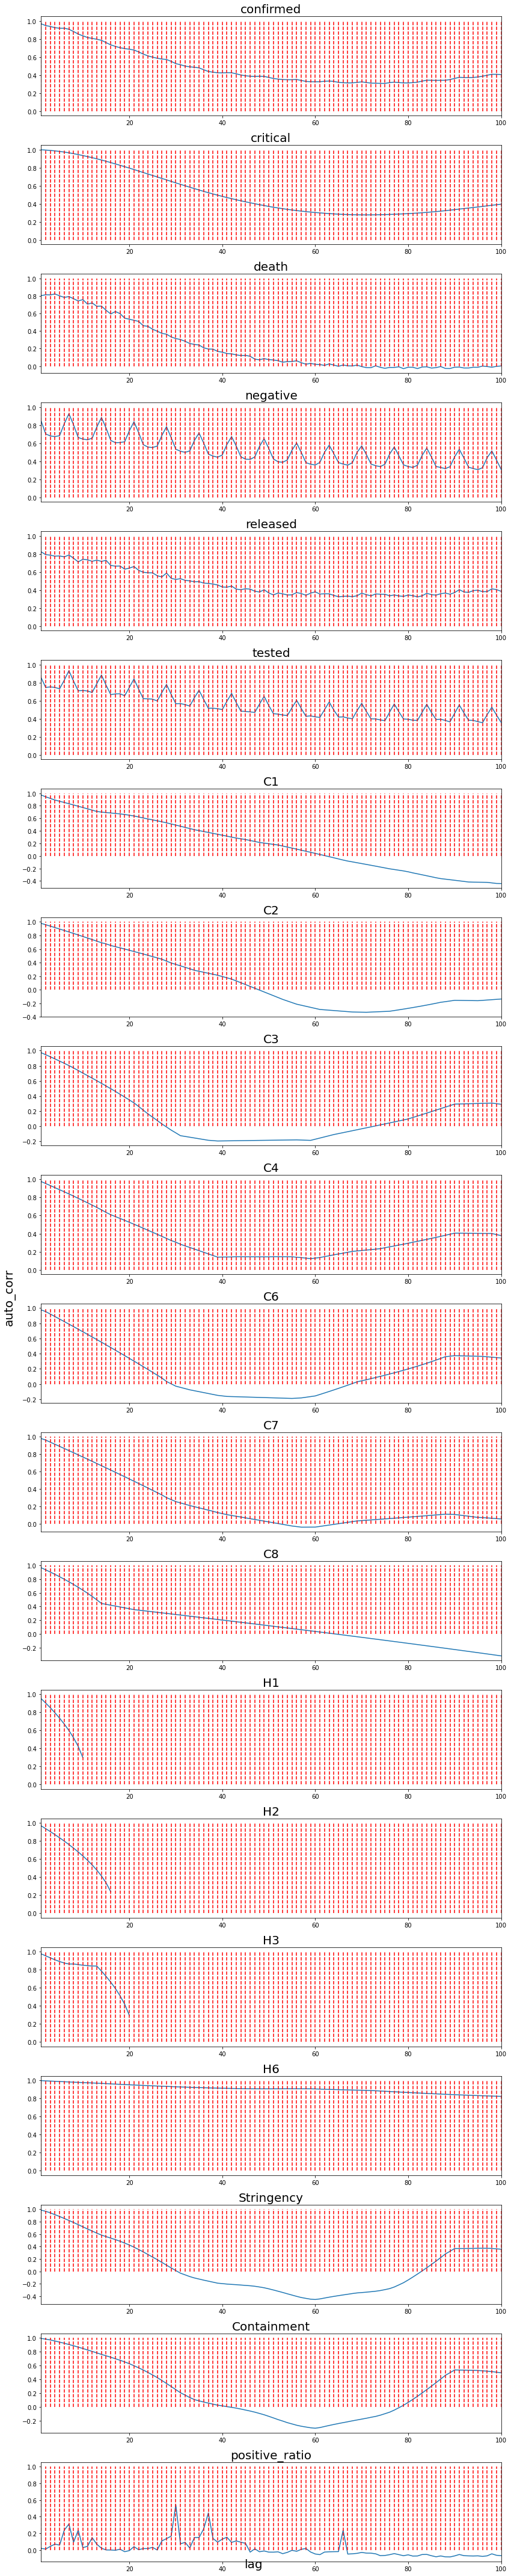

In [14]:
col_list = data.kor_daily_data.columns
num_cols = len(col_list)
lag_range = np.arange(1, 101, 1)
fig = plt.figure(figsize=(12, 3 * num_cols))


for i, col in enumerate(col_list):
    ax = plt.subplot(num_cols, 1, i + 1)
    corr = []
    for j, lag in enumerate(lag_range):
        corr.append(data.kor_daily_data[col].autocorr(lag=lag))
    ax.plot(lag_range, corr)

    for j in lag_range:
        ax.plot([j,j], [0,1], 'r--')

    ax.set_title(col_list[i], fontsize=20)
    ax.set_xlim(lag_range[0], lag_range[-1])
fig.supxlabel("lag", fontsize=20)
fig.supylabel("auto_corr", fontsize=20)
fig.tight_layout()

# Process data

In [30]:
data.shift('stringency_index', 37, in_place=True)

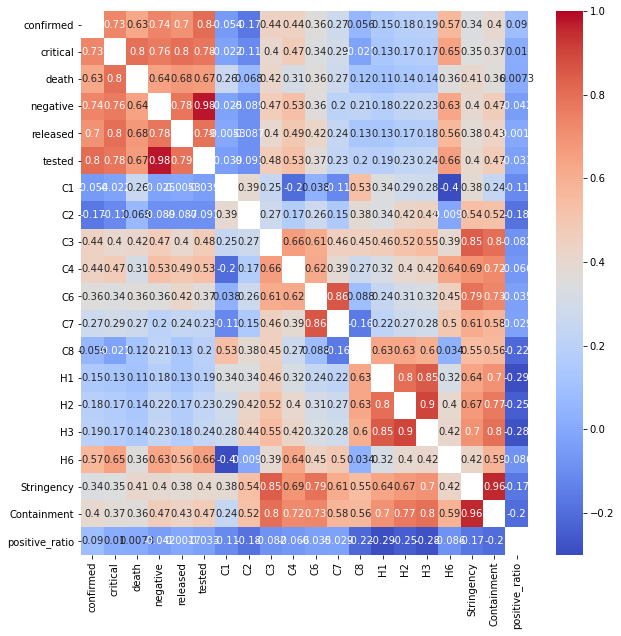

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = data.kor_daily_data[data.kor_daily_data.columns].corr()
mask = np.identity(len(corr))
sns.heatmap(corr, ax=ax, annot=True, mask=mask, cmap='coolwarm', vmin=-0.3, vmax=1)

fig.show()

In [11]:
data.kor_daily_data['stringency_index'] = data.kor_daily_data['stringency_index'].fillna(0)
data.kor_daily_data['positive_ratio'] = data.kor_daily_data['positive_ratio'].fillna(0)

In [20]:
data.save()

Total number of missing data: 0
